## News Scraper

In [2]:
# Import useful libraries
import ssl # open web page
from urllib.request import urlopen # open web page
from bs4 import BeautifulSoup as soup # analyse web, transfer to xml data
import pandas as pd # data analysis, save to 'excel' file

In [3]:
news_url = "https://news.google.com/news/rss/?ned=us&gl=US&hl=en"

# Template code from reference, may be related to web services control
context = ssl._create_unverified_context()
with urlopen(news_url, context=context) as client:
    xml_page = client.read()

soup_page = soup(xml_page, "xml")
news_list = soup_page.findAll("item")

# Initialize a list to save news below, 'list' is an important data structure in Python
news_data = []

# Save several important things in structured format, title, link, date, source, description
for i in news_list:
    news = {'Title': i.title.text,
            'Link': i.link.text,
            'Date': i.pubDate.text,
            'Source': i.source.text if i.source else 'No source exists',
            'Description': i.description.text if i.description else 'No description exists'
           }
    news_data.append(news)

# The structure of description is confused/complex, I will only consider more about 'Title' of each news

print('There are %d pieces of news in this page' % len(news_data))

There are 37 pieces of news in this page


The example of each 'description'

'<ol><li><a href="https://news.google.com/rss/articles/CBMiiwFBVV95cUxOckxwX1BURTRYdnRwNS1heF9BVVNCTU9PalpOenhvcEpSSTIwanpLNmtBRVBzSDRqcG0wZHVQUnhkRzZmWFIwcXl4dEU3azRmWVdKdnBsWUtoc0VnRlBPWDAzdDlqcU1idEtud0ZROHo0TTVzR3FUaFFFT1E0WlRSUlUxaUMwOEhZb1hN?oc=5" target="_blank">China May Chafe as North Korea Sends Soldiers to Fight Ukraine</a>&nbsp;&nbsp;<font color="#6f6f6f">The New York Times</font></li><li><a href="https://news.google.com/rss/articles/CBMiwgFBVV95cUxPSlV6UVFsLU13T1d2TEt0X3B1NnI4eU8zNzZWLWdLZXU0T0VwVE9JeDZSSWtnR3Q1enZ6ZmFHZXNRMkZBRUM0RWZPZ3VJeGFiWWJ0bjNmTW9tcmFNZWJOdTJtazJYUTJBMGpnN1B5b09QNFNnMFFQVEItaUx3TDdLVFpsUXVQZnltMHF5RTRpVlM4OTEwQ2F3d1ZEZmlfQUdncjFlRUpsVkR3MlZfYWtoNVRSUkpNYVZreVBVV24xeXpidw?oc=5" target="_blank">Seoul vows response as North Korean troops head to Ukraine</a>&nbsp;&nbsp;<font color="#6f6f6f">The Associated Press</font></li><li><a href="https://news.google.com/rss/articles/CBMiiAFBVV95cUxPZmJHaV9DUVFGbF9oQXB4WERrTUh3SjYzclRGUzUwN1JGQW8yQTdHQTdTMWNZcWRXd001ckJUclE0LS1PNVY1NFVUczluc3FzUkFBSzdFc3NKcjdWR0xvQlZ5RjRJemxDU3IzdGtobjFhRXlSblhNbnFvWm5HMzNQWFlVaXRhcEc4?oc=5" target="_blank">North Korean troops are in Russia, would be ‘legitimate targets’ in Ukraine, U.S. says</a>&nbsp;&nbsp;<font color="#6f6f6f">The Washington Post</font></li><li><a href="https://news.google.com/rss/articles/CBMigAFBVV95cUxQeF9vZG1sR1ktS3hEX0UxdmhLZzhDNnF2b0NQelNiVklPQlRuak9vMGsxaDZGa3FreFBOWkRuUFlWYzhIbXZyTUtlWG5hQW9wdU9oYXlEajR6bVJmdHVNczBCRWhiS2pKQUJPdHllR2g1al9Edlh2S0hIU1dKVlFZetIBhgFBVV95cUxNWEZNZjRRQi1qbXdSMFphSjlVSXNCOVQ3Zk9nRUlUb1E1dlJqM2J1alh4cXlwckp6b0xlMUtjbVFqVDhfYVZjdUtPZV9XSE55b2V3cWx2cV9WT0NwTlVlRzFoUjJ5SXh1TG9wM0U4cWgwRU9iX0pOcE5IZTJ5Tnd2UUdXQXVuQQ?oc=5" target="_blank">Key Republican: US should consider ‘direct military action’ if North Korean troops enter Ukraine</a>&nbsp;&nbsp;<font color="#6f6f6f">The Hill</font></li></ol>'

In [6]:
# Initialize a 'dataframe' to save all of news, 'dataframe' is a data structure in Pandas library
df_news = pd.DataFrame(news_data)
df_news.to_excel('news.xlsx', index=False)

In [8]:
# Overview of dataframe
df_news.Title[0:10]

0    Live updates: 2024 presidential election | CNN...
1    First Election Day vote in Dixville Notch spli...
2    The 10 state legislative chambers that could f...
3    Tropical Storm Rafael heads toward hurricane s...
4    So … How Does the Electoral College Work, Agai...
5    Joe Rogan gives backing to Donald Trump in US ...
6    An hour-by-hour guide to election night poll c...
7    5 things to know for Nov. 5: Election Day, Boe...
8    Control of Congress is at stake and with it a ...
9    These ‘bellwether’ counties could determine ne...
Name: Title, dtype: object

In [10]:
df_news.Title[2]

'The 10 state legislative chambers that could flip in 2024 - ABC News'

In [12]:
# Select each piece of news, the index start from 0
df_news.loc[1]

Title          First Election Day vote in Dixville Notch spli...
Link           https://news.google.com/rss/articles/CBMilAFBV...
Date                               Tue, 05 Nov 2024 11:00:08 GMT
Source                                              PBS NewsHour
Description    <ol><li><a href="https://news.google.com/rss/a...
Name: 1, dtype: object

## Data Visualization

In order to read today's news more directly

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [16]:
# Add a blank between every two news
text = ' '.join(df_news.Title)

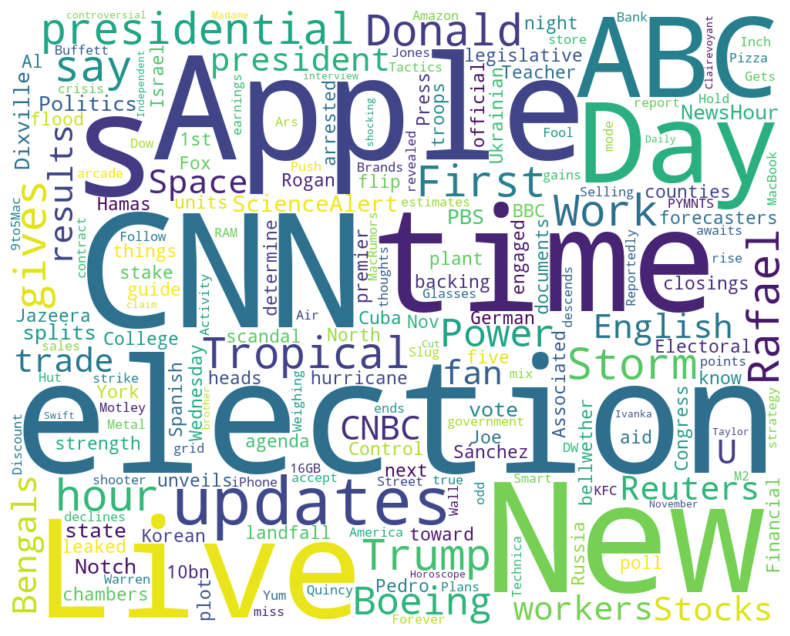

In [18]:
# Template code of wordcloud
wordcloud = WordCloud(width=1000, 
                      height=800, 
                      background_color='white', 
                      relative_scaling=0.2, 
                      max_font_size=300).generate(text)


plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # image simplify

plt.savefig('wordcloud.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

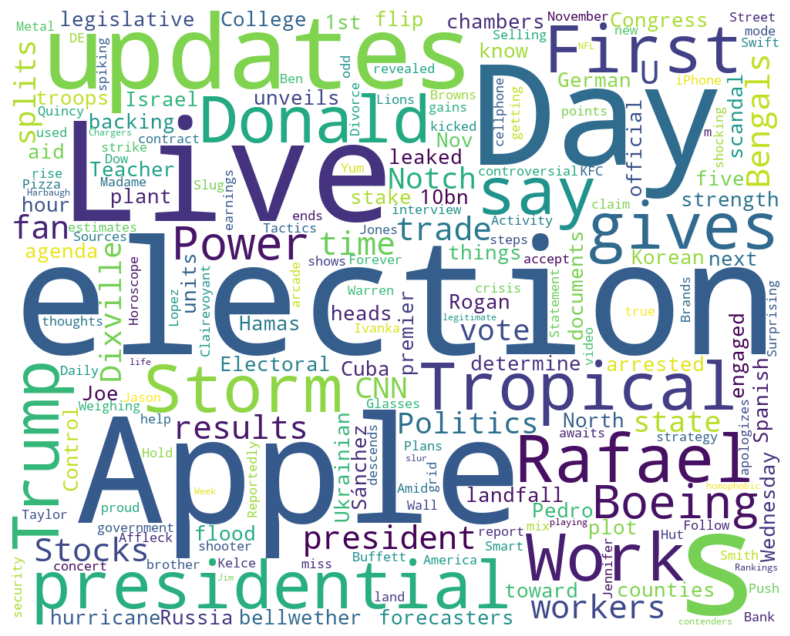

In [20]:
# Delete unless words
df_news['Title'] = df_news['Title'].str.split('-').str[0].str.strip()

text = ' '.join(df_news.Title)

# Template code of wordcloud
wordcloud = WordCloud(width=1000, 
                      height=800, 
                      background_color='white', 
                      relative_scaling=0.2, 
                      max_font_size=300).generate(text)


plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # image simplify

plt.savefig('wordcloud_clean.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# News Scraper and Word Cloud Generator 📰☁️

This Python project fetches the latest news from Google News, extracts key information, and generates a word cloud based on the news titles.

## Features
1. **News Scraper**:
   - Fetches news articles from Google News RSS feed.
   - Extracts structured information including:
     - Title
     - Link
     - Date
     - Source
     - Description
   - Saves the news data to an Excel file for further analysis.

2. **Word Cloud Generator**:
   - Analyzes news titles to create a word cloud visualization.
   - Highlights the most frequently occurring words for easy comprehension.

## Installation

pip install pandas beautifulsoup4 matplotlib wordcloud



## Usage

	Run the script in the notebook


## File Structure

- News Scraper.ipynb: Main Python script for the project.
- news.xlsx: Excel file containing structured news data.
- wordcloud.png: Word cloud image generated from news titles.

## Dependencies

- Python 3
- pandas: For structured data handling and saving to Excel.
- beautifulsoup4: For parsing RSS XML data.
- matplotlib: For visualizing the word cloud.
- wordcloud: For generating the word cloud.


## Future Improvements

1. Improve description parsing for better keyword extraction.
2Support multiple RSS feeds for broader news coverage.
	3.	Add sentiment analysis for each news title.

License

This project is licensed under the MIT License. See the LICENSE file for more details.

Contact

For questions or suggestions, contact:

	•	Developer: Alan
	•	Email: alan@example.com

这份 `README.md` 文件清晰地展示了项目的功能和用法，同时还可以根据你的实际需求调整或补充内容！如果需要进一步修改，请告诉我！